<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [1]:
## Import libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.utils import shuffle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [2]:
diabetes = load_diabetes()

In [3]:
type(diabetes)

sklearn.utils._bunch.Bunch

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### Prepare input data

In [5]:
X = diabetes.data
y = diabetes.target

In [7]:
X_cols = X.shape[1]
X_cols

10

In [9]:
X.shape

(442, 10)

In [8]:
len(y)

442

### Split the data (training/test)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [11]:
model = Sequential()

In [13]:
# Add the first hidden layer
model.add(Dense(15, activation = 'relu', input_shape = (X_cols, )))
# Add the second hidden layer
model.add(Dense(5, activation = 'relu'))
# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [17]:
#output = model(dot(input, kernel) + bias)

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 5)                 80        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [18]:
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [19]:
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

In [20]:
%%time
history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 1000,
    verbose = 1)

Epoch 1/1000
24/24 [==============================] - 1s 10ms/step - loss: 28746.7578 - mse: 28746.7578 - val_loss: 28102.4551 - val_mse: 28102.4551
Epoch 2/1000
24/24 [==============================] - 0s 2ms/step - loss: 28731.6738 - mse: 28731.6738 - val_loss: 28082.0410 - val_mse: 28082.0410
Epoch 3/1000
24/24 [==============================] - 0s 2ms/step - loss: 28701.4551 - mse: 28701.4551 - val_loss: 28040.5742 - val_mse: 28040.5742
Epoch 4/1000
24/24 [==============================] - 0s 2ms/step - loss: 28651.9609 - mse: 28651.9609 - val_loss: 27984.9297 - val_mse: 27984.9297
Epoch 5/1000
24/24 [==============================] - 0s 2ms/step - loss: 28587.8789 - mse: 28587.8789 - val_loss: 27910.1543 - val_mse: 27910.1543
Epoch 6/1000
24/24 [==============================] - 0s 3ms/step - loss: 28500.8945 - mse: 28500.8945 - val_loss: 27808.0039 - val_mse: 27808.0039
Epoch 7/1000
24/24 [==============================] - 0s 2ms/step - loss: 28377.7910 - mse: 28377.7910 - val_lo

### Create predictions

In [21]:
predictions = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


### Evaluate the model

In [22]:
# Calculate test MSE
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])

5/5 [==============================] - 0s 1ms/step - loss: 3270.0173 - mse: 3270.0173

Test loss: 3270.017334


In [23]:
score

[3270.017333984375, 3270.017333984375]

In [24]:
RMSE = score[0] ** (1/2)
RMSE

57.184065385248495

### Visualisation of cost

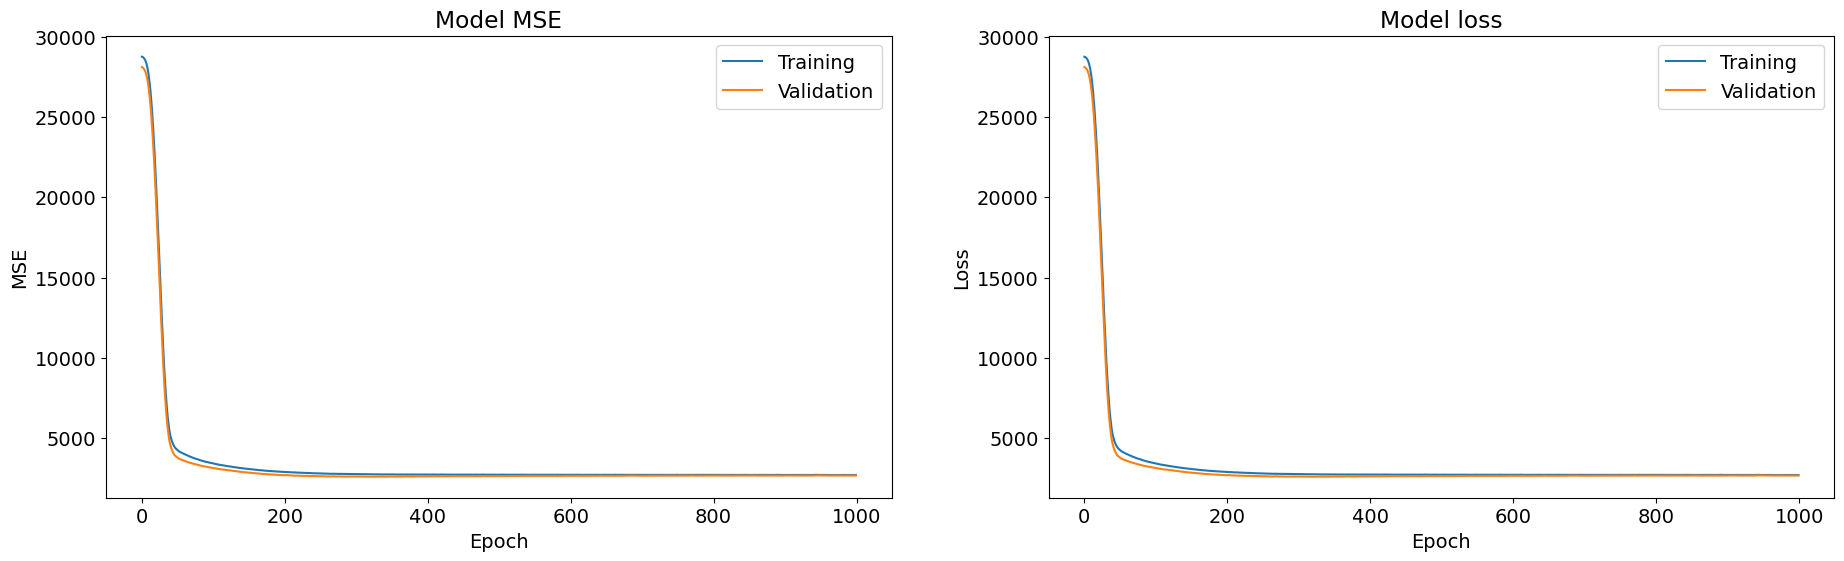

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

### Visualisation of residuals

In [26]:
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

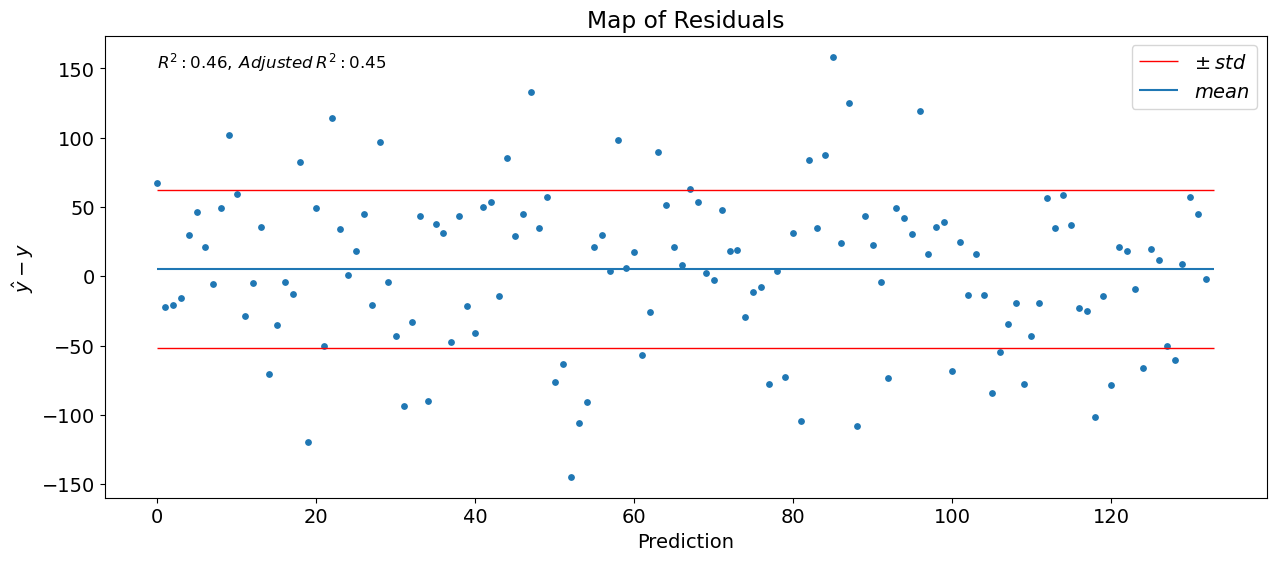

In [35]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.title("Map of Residuals")
plt.show()



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



